# Proyecto de Análisis Exploratorio de Datos (EDA)

Este proyecto tiene como objetivo realizar un análisis exploratorio de dos conjuntos de datos relacionados con campañas de marketing directo de una institución bancaria portuguesa. Se utilizarán herramientas como **Python**, **Pandas**, **Matplotlib** y **Seaborn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Carga de los datos

In [2]:
bank_df = pd.read_csv('../data/bank-additional.csv', sep=',')
excel_df_2018 = pd.read_excel('../data/customer-details.xlsx', sheet_name=0)
excel_df_2019 = pd.read_excel('../data/customer-details.xlsx', sheet_name=1)
excel_df_2020 = pd.read_excel('../data/customer-details.xlsx', sheet_name=2)

## Exploración inicial de los datos

In [3]:
bank_df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [5]:
bank_df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
count,43000.000000,37880.000000,42655,42915,41193,34019.000000,41974.000000,41974.000000,43000,43000.000000,...,43000.000000,42529,43000,33744,43000,43000,42752,43000.000000,43000.000000,43000
unique,NaN,NaN,11,3,7,NaN,NaN,NaN,2,NaN,...,NaN,26,26,309,11,2,1825,NaN,NaN,43000
top,NaN,NaN,admin.,MARRIED,university.degree,NaN,NaN,NaN,cellular,NaN,...,NaN,"93,994","-36,4","4,857","5228,1",no,28-febrero-2018,NaN,NaN,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,NaN,NaN,10873,25999,12722,NaN,NaN,NaN,27396,NaN,...,NaN,7938,8020,2287,16980,38156,95,NaN,NaN,1
mean,20651.099047,39.977112,NaN,NaN,NaN,0.000088,0.535998,0.155620,NaN,257.739279,...,0.077128,NaN,NaN,NaN,NaN,NaN,NaN,36.856697,-95.939067,NaN
std,11868.770913,10.437957,NaN,NaN,NaN,0.009390,0.498708,0.362499,NaN,258.666033,...,1.573898,NaN,NaN,NaN,NaN,NaN,NaN,7.225948,16.752282,NaN
min,0.000000,17.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,-3.400000,NaN,NaN,NaN,NaN,NaN,NaN,24.396000,-124.997000,NaN
25%,10381.750000,32.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,102.000000,...,-1.800000,NaN,NaN,NaN,NaN,NaN,NaN,30.614750,-110.494250,NaN
50%,20642.500000,38.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,179.000000,...,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,36.761000,-95.899500,NaN
75%,30930.250000,47.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,319.000000,...,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,43.113250,-81.427750,NaN


## Limpieza de datos

In [6]:
bank_df.isnull().sum()

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [7]:
bank_df.duplicated().sum()

np.int64(0)

In [8]:
bank_df['date'] = pd.to_datetime(bank_df['date'], errors='coerce')

C:\Users\rober\AppData\Local\Temp\ipykernel_22404\1082429747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_df['date'] = pd.to_datetime(bank_df['date'], errors='coerce')


## Análisis Univariado

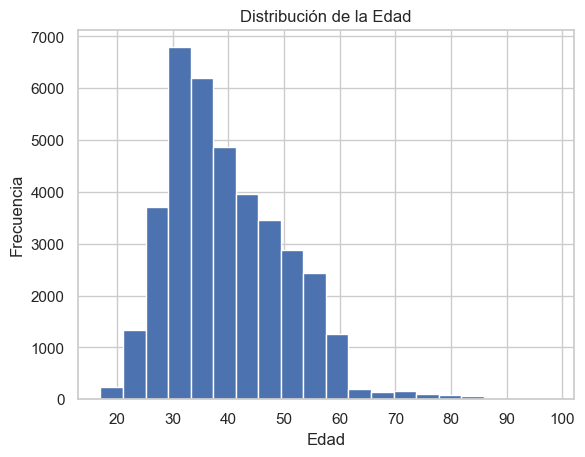

In [9]:
bank_df['age'].hist(bins=20)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Análisis Bivariado

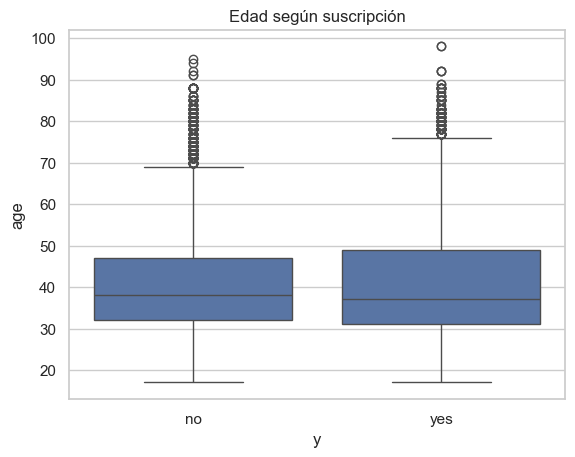

In [10]:
sns.boxplot(x='y', y='age', data=bank_df)
plt.title('Edad según suscripción')
plt.show()

## Matriz de Correlación

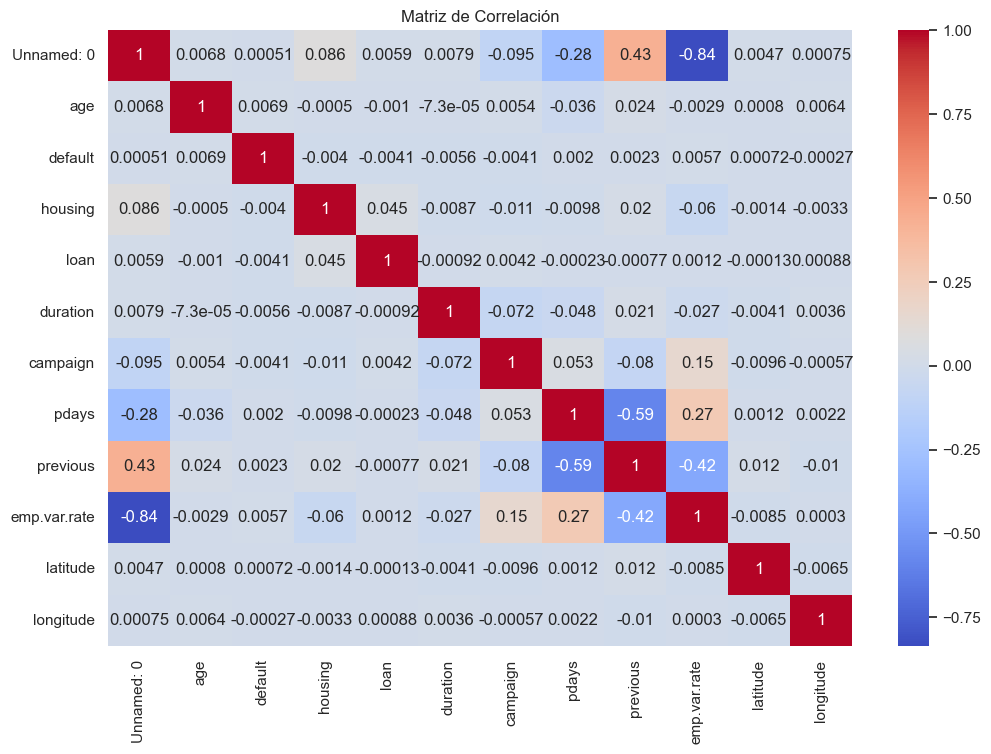

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(bank_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Combinación con datos demográficos (Excel)

In [12]:
excel_full = pd.concat([excel_df_2018, excel_df_2019, excel_df_2020])
df_merged = pd.merge(bank_df, excel_full, how='left', left_on='id_', right_on='ID')
df_merged.head()

,Unnamed: 0_x,age,job,marital,education,default,housing,loan,contact,duration,...,latitude,longitude,id_,Unnamed: 0_y,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


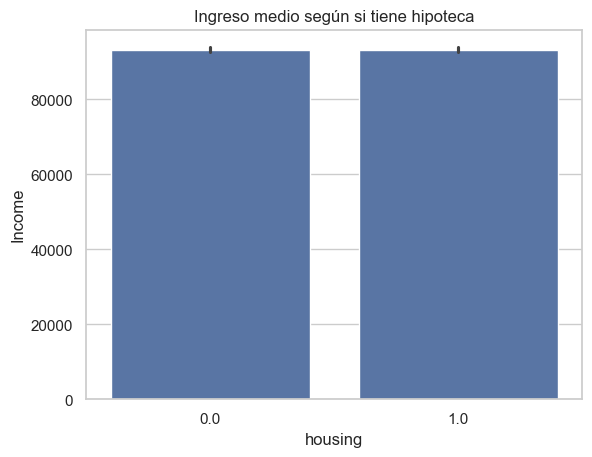

In [13]:
sns.barplot(x='housing', y='Income', data=df_merged)
plt.title('Ingreso medio según si tiene hipoteca')
plt.show()

## Conclusiones

- La mayoría de los clientes tienen entre 30 y 50 años.
- La duración de la llamada parece estar muy relacionada con la probabilidad de éxito.
- Los clientes con mayores ingresos tienden a tener hipoteca.

Este análisis permite conocer mejor a los clientes y optimizar futuras campañas.